In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - Prices_material_plant.csv
/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - Monthly Actuals.csv
/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - BCR table.csv
/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - Monthly Targets.csv


In [109]:
actuals_df = pd.read_csv('/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - Monthly Actuals.csv')
price_df = pd.read_csv('/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - Prices_material_plant.csv')
bcr_df = pd.read_csv('/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - BCR table.csv')
monthly_target_df = pd.read_csv('/kaggle/input/inputs/Global Command Center_Case Studies.pptx-EmbeddedFile.xlsx - Monthly Targets.csv')

## **Actuals Dataset**

In [116]:
actuals_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65065 entries, 0 to 65064
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Material Description  65064 non-null  object
 1   Plant                 65064 non-null  object
 2   Period                65065 non-null  int64 
 3   Year                  65065 non-null  int64 
 4   Amount in LC          65065 non-null  object
 5   Quantity              65065 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.0+ MB


# **Price Dataset**

In [117]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Plant                 519 non-null    object
 1   Material Description  519 non-null    object
 2    Price per case       491 non-null    object
dtypes: object(3)
memory usage: 12.3+ KB


In [112]:
price_df.replace("#VALUE!", np.NaN, inplace = True)
price_df[" Price per case "].unique()

array(['16.0359', '16.9192', '16.9161', '23.9358', '263.2608', '8.1442',
       '7.9942', '8.8744', '8.8775', '15.8942', '6.5464', '5.9423',
       '14.5692', '7.4124', '0.8338', '350.7608', '16.0358', '14.5942',
       '21.7608', '17.6025', '20.8775', '12.4525', '14.3690', '25.2640',
       '17.2223', '29.6525', '24.9116', '133.4358', '40.7775', '0.1025',
       '233.4358', '23.4358', nan, '17.5025', '25.5442'], dtype=object)

In [91]:
price_df[' Price per case '] = price_df[' Price per case '].astype(float)

In [113]:
price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Plant                 519 non-null    object
 1   Material Description  519 non-null    object
 2    Price per case       491 non-null    object
dtypes: object(3)
memory usage: 12.3+ KB


# **BCR Dataset**

In [118]:
bcr_df = bcr_df.rename(columns={"Material Number": "Material Description"})
bcr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Material Description  74 non-null     object
 1   Bottle                61 non-null     object
 2   Crate                 69 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


# **Monthly Target Dataset**

In [119]:
monthly_target_df = monthly_target_df.rename(columns={"Material Number": "Material Description"})
monthly_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  926 non-null    int64 
 1   Period                926 non-null    int64 
 2   Plant                 226 non-null    object
 3   Material Description  354 non-null    object
 4   Target Value in LC    926 non-null    object
 5   Target Quantity       926 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 43.5+ KB


# **Data Cleaning**

## 1. Price dataset

In [95]:
num_features = price_df.select_dtypes(exclude="object").columns

In [96]:
price_df.isna().sum()

Plant                    0
Material Description     0
 Price per case         28
dtype: int64

In [97]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

# KNN = KNNImputer(missing_values=np.nan, n_neighbors=10, weights = 'distance' , metric='nan_euclidean')
imputer_transformer = ColumnTransformer([
    ('KNN', KNNImputer(missing_values=np.nan, n_neighbors=10, weights = 'distance' , metric='nan_euclidean'), num_features)],
    remainder="passthrough")

price_df = pd.DataFrame(imputer_transformer.fit_transform(price_df))

In [103]:
column_mapping = {0: 'Plant',
                  1: 'Material Description',
                  2: 'Price per case'}

price_df.rename(columns=column_mapping, inplace=True)

In [104]:
price_df.isna().sum()

Plant                   0
Material Description    0
Price per case          0
dtype: int64

# Merging differnt features

In [105]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Plant                 519 non-null    object
 1   Material Description  519 non-null    object
 2   Price per case        519 non-null    object
dtypes: object(3)
memory usage: 12.3+ KB


In [120]:
# Merging Price with BCR on "Material Description"
price_bcr = pd.merge(price_df, bcr_df, on = ["Material Description"], how = "left")

In [123]:
price_bcr.replace("#VALUE!", np.NaN, inplace = True)
price_bcr[' Price per case '] = price_bcr[' Price per case '].astype(float)

In [124]:
price_bcr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Plant                 634 non-null    object 
 1   Material Description  634 non-null    object 
 2    Price per case       606 non-null    float64
 3   Bottle                255 non-null    object 
 4   Crate                 310 non-null    object 
dtypes: float64(1), object(4)
memory usage: 29.7+ KB


In [126]:
# Merging the merged price_bcr with actuals
consolidated_view = pd.merge(price_bcr, actuals_df, on=["Material Description", "Plant"], how="left")

In [131]:
consolidated_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129495 entries, 0 to 129494
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Plant                 129495 non-null  object 
 1   Material Description  129495 non-null  object 
 2    Price per case       129467 non-null  float64
 3   Bottle                127975 non-null  object 
 4   Crate                 129084 non-null  object 
 5   Period                128960 non-null  float64
 6   Year                  128960 non-null  float64
 7   Amount in LC          128960 non-null  object 
 8   Quantity              128960 non-null  float64
 9   Crate Rands           128960 non-null  float64
 10  Bottle Rands          128960 non-null  float64
dtypes: float64(6), object(5)
memory usage: 11.9+ MB


## **Net amount for case/crate in rands** = (Price per case)*(Quantity)
___________________________________________________________________
## **Amount per bottle in rands** = (Amount of per crate) / (24 bottles in a crate/case)

In [130]:
# Calculate Crate Rands
consolidated_view["Crate Rands"] = consolidated_view[" Price per case "] * consolidated_view["Quantity"]

# Calculate Bottle Rands
consolidated_view["Bottle Rands"] = consolidated_view["Crate Rands"] / 24




In [132]:
consolidated_view.head(10)

,Plant,Material Description,Price per case,Bottle,Crate,Period,Year,Amount in LC,Quantity,Crate Rands,Bottle Rands
0,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"2,989.67",106.0,1699.8054,70.825225
1,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"3,093.96",109.0,1747.9131,72.829713
2,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"9,455.71",331.0,5307.8829,221.161788
3,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"9,455.71",331.0,5307.8829,221.161788
4,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"8,395.42",294.0,4714.5546,196.439775
5,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"8,430.18",295.0,4730.5905,197.107938
6,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"8,586.62",301.0,4826.8059,201.116913
7,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"8,464.95",297.0,4762.6623,198.444263
8,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"11,332.95",397.0,6366.2523,265.260513
9,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart,7.0,2022.0,"11,298.18",395.0,6334.1805,263.924188


In [122]:
price_bcr.head(10)

,Plant,Material Description,Price per case,Bottle,Crate
0,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart
1,AA,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Crate: Brown Quart,Crate: Brown Quart
2,AD,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart
3,AD,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Crate: Brown Quart,Crate: Brown Quart
4,AG,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart
5,AG,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Crate: Brown Quart,Crate: Brown Quart
6,AF,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart
7,AF,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Crate: Brown Quart,Crate: Brown Quart
8,AC,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Bottle: 750RB Amber Calabash,Crate: Brown Quart
9,AC,B&CR: 750RB Amber Calabash & Brown Crate,16.0359,Crate: Brown Quart,Crate: Brown Quart


In [147]:
consolidated_view_targets = pd.merge(consolidated_view, monthly_target_df, on=["Material Description"], how="left")

# **Data Visualization ~EDA**

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

### **Visualizing total "Bottle Rands" and "Crate Rands" by Plant**

/tmp/ipykernel_32/1751634421.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plant_totals = consolidated_view.groupby('Plant')['Bottle Rands', 'Crate Rands'].sum().reset_index()
/tmp/ipykernel_32/1751634421.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Plant', y='value', hue='variable', data=pd.melt(plant_totals, id_vars='Plant'), ci=None)


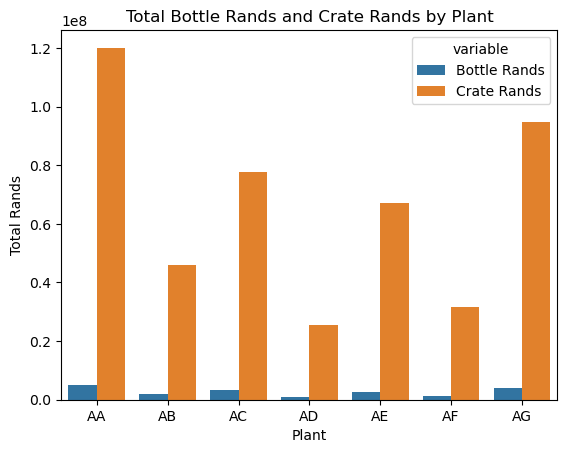

In [135]:
# Grouping the data by Plant and calculating the sum of Bottle Rands and Crate Rands
plant_totals = consolidated_view.groupby('Plant')['Bottle Rands', 'Crate Rands'].sum().reset_index()

# Plotting the bar chart
sns.barplot(x='Plant', y='value', hue='variable', data=pd.melt(plant_totals, id_vars='Plant'), ci=None)
plt.xlabel('Plant')
plt.ylabel('Total Rands')
plt.title('Total Bottle Rands and Crate Rands by Plant')
plt.show()

### **Comparing the distribution of Bottle Prices and Crate Prices across Plants**

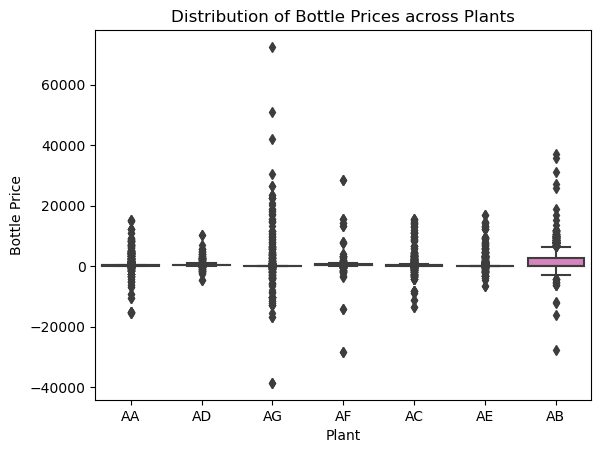

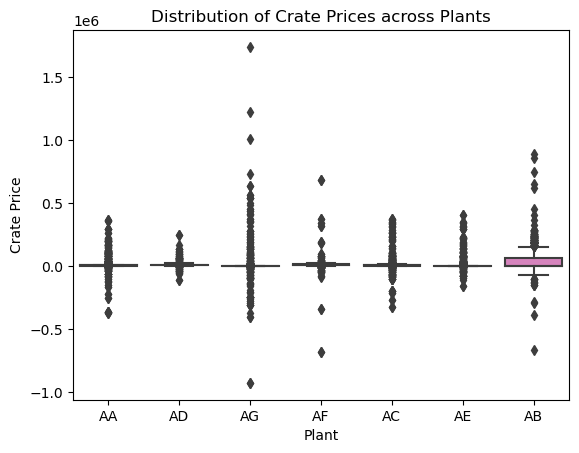

In [138]:
sns.boxplot(x='Plant', y='Bottle Rands', data=consolidated_view)
plt.xlabel('Plant')
plt.ylabel('Bottle Price')
plt.title('Distribution of Bottle Prices across Plants')
plt.show()

sns.boxplot(x='Plant', y='Crate Rands', data=consolidated_view)
plt.xlabel('Plant')
plt.ylabel('Crate Price')
plt.title('Distribution of Crate Prices across Plants')
plt.show()

### **Heatmap**

/tmp/ipykernel_32/2584177129.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = consolidated_view[numerical_columns].corr()


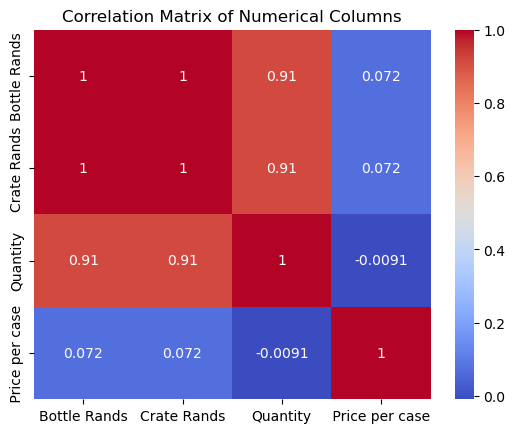

In [155]:
numerical_columns = ['Bottle Rands', 'Crate Rands', 'Quantity', 'Plant', ' Price per case ']

# Calculating the correlation matrix
correlation_matrix = consolidated_view[numerical_columns].corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### **Varience Analysis: Actual Quantity vs Target Quantity wrt Material Dsc.**

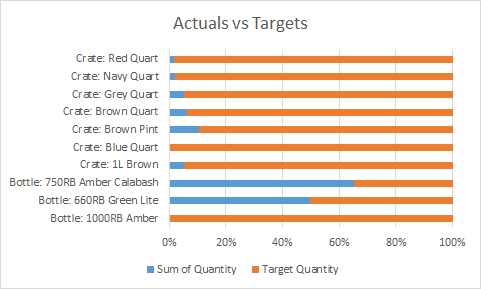

## **Trend analysis**

/tmp/ipykernel_32/3209605072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = consolidated_view.groupby(['Bottle', 'Plant', 'Crate']).sum().reset_index()


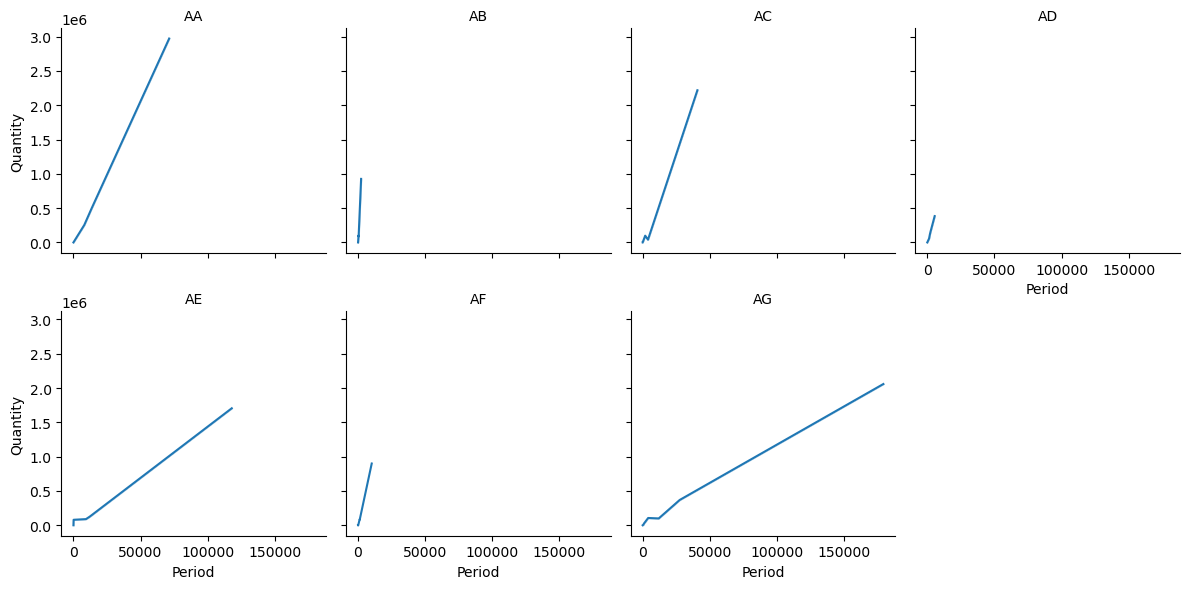

In [175]:
grouped_df = consolidated_view.groupby(['Bottle', 'Plant', 'Crate']).sum().reset_index()

# Plotting trend analysis for each Category and Plant combination
g = sns.FacetGrid(grouped_df, col='Plant', col_wrap=4)
g.map(sns.lineplot, 'Period', 'Quantity')
g.set_titles('{col_name}')
g.set_xlabels('Period')
g.set_ylabels('Quantity')
plt.tight_layout()
plt.show()